In [1]:
%cd "../"
%pwd

import numpy as np
import matplotlib.pyplot as plt

import io 
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *
from Filter_FS import *
from hybrid_FS import *
from overlap_genes import *
from crossValidation import *

/Users/dormann/Documents/GitHub/src


In [2]:
#Fixing seed to get reproducible results
random.seed(3)
np.random.seed(3)

# Baseline with preselected genes 

In [3]:
#Load preprocess data
AE4 = np.array(pd.read_csv ('../data/processed_data/AE4.csv'))
y = np.array(AE4[:,-1],dtype=int)
AE4 = AE4[:,0:-1]


In [4]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4,y)

In [5]:
print(AE4.shape, len(pred))
acc = model.score_
print(acc)

(1473, 9870) 1473
0.04871660555264536


In [6]:
print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (93.0, 1816.0, 0.051211453744493395, 0.16970802919708028, 0.9925993544811398, 0.04871660555264536, 0.9981354216610729, 0.9512833944473547, 0.8302919708029197)


# Mutual information maximizer (MIM)

test 0.220035478596429 0.01660935899779797
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (273.0, 1687.0, 0.16182572614107885, 0.4032496307237814, 0.9928434163248164, 0.1392857142857143, 0.9982767739844056, 0.8607142857142858, 0.5967503692762186)


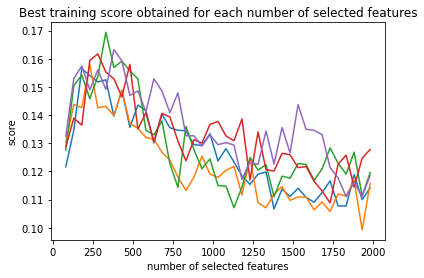

In [7]:
#Define parameters for MIM method
N = np.arange(80,2000,50)
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 3, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,AE4, FamiliesClusters, compute_precision,True, 5,  MIM, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = AE4[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Anova F test

test 0.23137495623700866 0.0159063824190214
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (286.0, 1656.0, 0.17270531400966183, 0.4218289085545723, 0.9931654409033505, 0.14727085478887744, 0.9983736734236663, 0.8527291452111225, 0.5781710914454278)


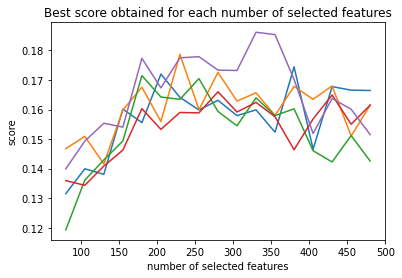

In [8]:
#Define parameters for ANOVA method
N = np.arange(80,500,25)
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,AE4, FamiliesClusters, compute_precision,True, 5,  ANOVA, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = AE4[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))    

In [9]:
#Create .csv with names of this subset
best_subset = subset
get_best_genes_names(best_subset, '../data/processed_data/AE4genes_interest.csv', '../data/optimized_subsets/AE4genes_best.csv')

1
test 0.22312748169102567 0.02286256392479249
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (281.0, 1656.0, 0.16968599033816426, 0.402002861230329, 0.993453173985064, 0.14506969540526587, 0.9983393521884398, 0.8549303045947341, 0.597997138769671)


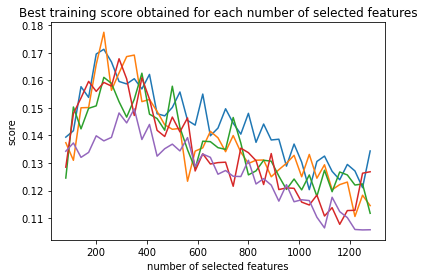

2
test 0.22381309746559858 0.016642992468615746
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (269.0, 1646.0, 0.16342648845686514, 0.4057315233785822, 0.9932452396585686, 0.14046997389033944, 0.9983747751909845, 0.8595300261096606, 0.5942684766214178)


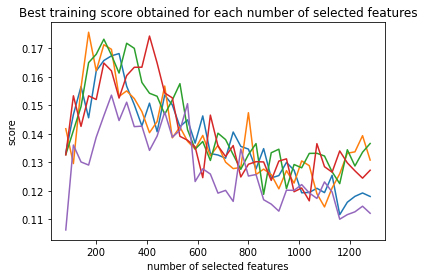

3
test 0.2293747421909021 0.04042195036805544
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (277.0, 1635.0, 0.1694189602446483, 0.40086830680173663, 0.993576446183584, 0.1448744769874477, 0.9983656453924228, 0.8551255230125523, 0.5991316931982634)


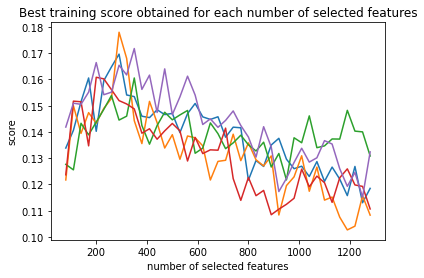

4
test 0.23601248492262075 0.02604602098669555
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (285.0, 1625.0, 0.1753846153846154, 0.3963838664812239, 0.9937877038588873, 0.14921465968586387, 0.9983332501238541, 0.8507853403141361, 0.6036161335187761)


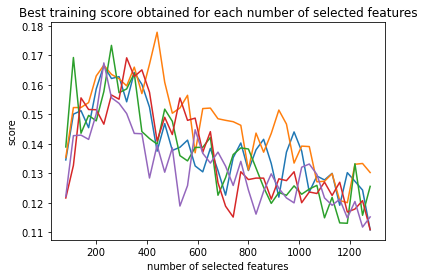

5
test 0.2243313549232786 0.028032269881085776
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (245.0, 1596.0, 0.15350877192982457, 0.3253652058432935, 0.9945333666720328, 0.13307984790874525, 0.9982534852938648, 0.8669201520912547, 0.6746347941567065)


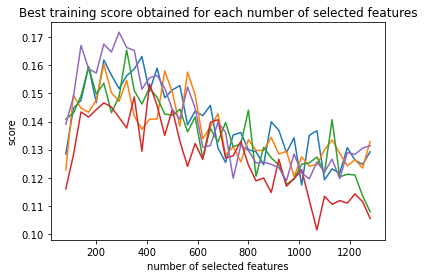

6
test 0.21800977598806978 0.020788063751498585
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (286.0, 1663.0, 0.1719783523752255, 0.44135802469135804, 0.9929469643955299, 0.14674191893278604, 0.9984561846437283, 0.8532580810672139, 0.558641975308642)


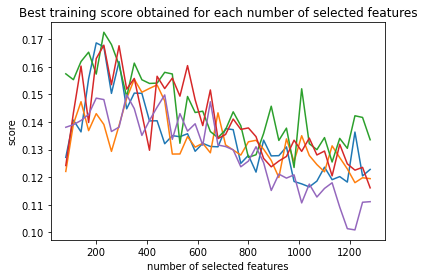

7
test 0.22403773986500625 0.013281010876932684
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (270.0, 1590.0, 0.16981132075471697, 0.3840682788051209, 0.9940010186949386, 0.14516129032258066, 0.9983591523676711, 0.8548387096774194, 0.615931721194879)


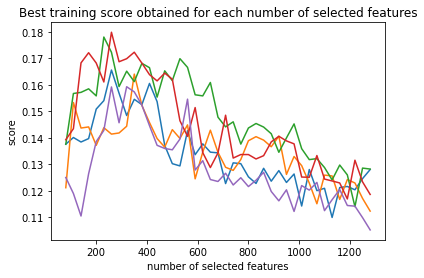

8
test 0.21951955154958144 0.02415855232610216
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (256.0, 1567.0, 0.1633694958519464, 0.3526170798898072, 0.9945305028307353, 0.14042786615469008, 0.9983531942775253, 0.85957213384531, 0.6473829201101928)


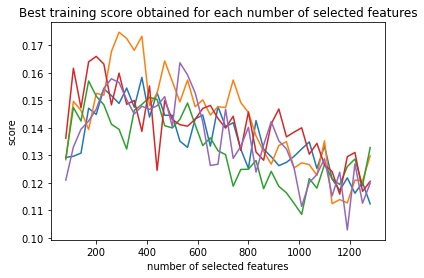

9
test 0.21900742739186224 0.020487259545741866
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (281.0, 1564.0, 0.1796675191815857, 0.4014285714285714, 0.9941842088627599, 0.15230352303523034, 0.9984352710080738, 0.8476964769647697, 0.5985714285714285)


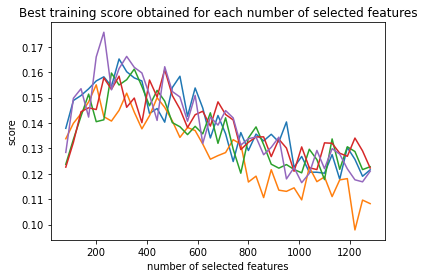

10
test 0.21909309615805203 0.03449700016903949
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (279.0, 1599.0, 0.17448405253283303, 0.3997134670487106, 0.994006499518346, 0.1485623003194888, 0.9984224932137089, 0.8514376996805112, 0.6002865329512894)


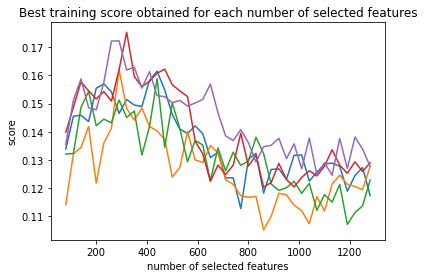

11
test 0.21168996719109884 0.043020173527098825
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (281.0, 1560.0, 0.18012820512820513, 0.37667560321715815, 0.9946352115824406, 0.15263443780554048, 0.9983948358590217, 0.8473655621944596, 0.6233243967828418)


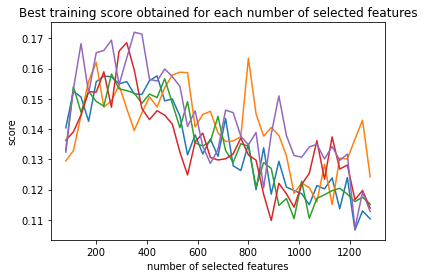

12
test 0.22364163350511285 0.04412123010700962
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (288.0, 1572.0, 0.183206106870229, 0.4, 0.994237895732304, 0.15483870967741936, 0.9984098764341479, 0.8451612903225807, 0.6)


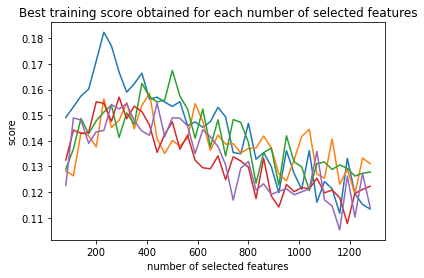

In [10]:
neighbors =  np.arange(1,13,1)
score_plot = []

for p in neighbors:
    print(p)
    #Define parameters for MIM method
    N = np.arange(80,1300,30)
    kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 3, 'plot': True} 

    subset, score_training, score_testing = cross_validation(y,AE4, FamiliesClusters, compute_precision,True, 5,  MIM, **kwargs)

    mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
    print('test', mean_score_test, std_score_test)

    #Predict and evaluate on whole data  set
    model = FamiliesClusters(np.unique(y),compute_precision,True)
    x_subset = AE4[:, subset]
    pred = model.fit_predict(x_subset,y)

    print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))
    plt.show()

# Hybrid methods

# Mutual information and stimulated annealing

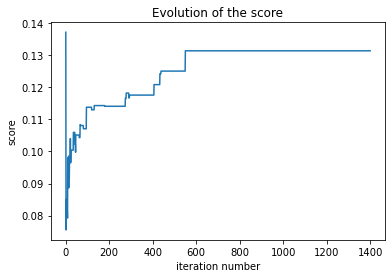

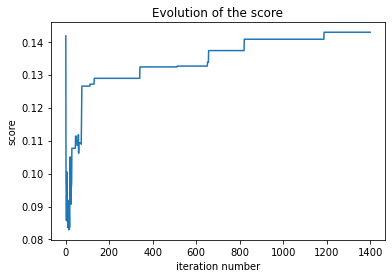

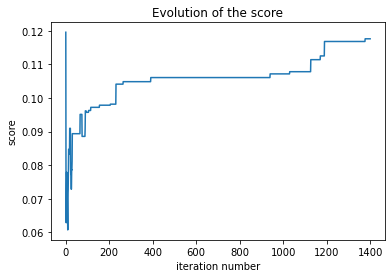

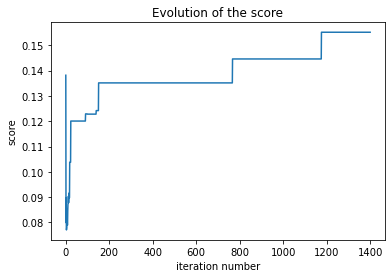

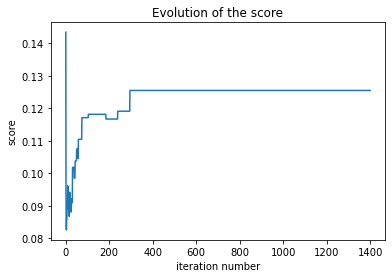

test 0.16420240512860115 0.017656660361167035
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (186.0, 1740.0, 0.10689655172413794, 0.3089700996677741, 0.992601160002041, 0.09657320872274143, 0.9982210666757894, 0.9034267912772586, 0.6910299003322259)


In [11]:
#Define parameters for MI + stimulated annealing method
N = np.array([700])
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_iter': 1400, 'n_neighbors': 3, 'p_mutate': 0.1, 'c': 1, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,AE4, FamiliesClusters, compute_precision,True, 5,  MI_stimulated_annealing, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = AE4[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred)) 

# Mutual information and genetic feature selection

In [10]:
#Define parameters for MI + genetic algorithm method
N = np.array([700])                            
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 3, 'n_population': 300, 'crossover_proba': 0.5, 'mutation_proba': 0.2, 'n_generations': 120, 'tournament_size': 3, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,AE4, FamiliesClusters, compute_precision,True, 5,  MI_genetic_fs, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = AE4[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred)) 

Process ForkPoolWorker-2:
Process ForkPoolWorker-1:


KeyboardInterrupt: 

Traceback (most recent call last):
  File "/Users/dormann/opt/anaconda3/lib/python3.9/site-packages/multiprocess/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/dormann/opt/anaconda3/lib/python3.9/site-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/dormann/opt/anaconda3/lib/python3.9/site-packages/multiprocess/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/Users/dormann/opt/anaconda3/lib/python3.9/site-packages/multiprocess/pool.py", line 48, in mapstar
    return list(map(*args))
  File "/Users/dormann/opt/anaconda3/lib/python3.9/site-packages/genetic_selection/gscv.py", line 126, in _evalFunction
    scores = cross_val_score(estimator=estimator, X=X_selected, y=y, groups=groups, scoring=scorer,
  File "/Users/dormann/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/dormann/opt/anac